# Explore here

In [1]:
import os
import spotipy
from dotenv import load_dotenv
load_dotenv()

client_id = os.environ.get('CLIENT_ID')
client_secret = os.environ.get('CLIENT_SECRET')

In [2]:
from spotipy.oauth2 import SpotifyClientCredentials

con = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))

In [3]:

artist_id = '5TeBsszZQTyqBX4eDHdtNx'

response = con.artist_top_tracks(artist_id)
if response:
  tracks = response["tracks"]
  tracks = [{k: (v/(1000*60))%60 if k == "duration_ms" else v for k, v in track.items() if k in ["name", "popularity", "duration_ms"]} for track in tracks]
  
import pandas as pd

tracks_df = pd.DataFrame.from_records(tracks)
tracks_df.sort_values(["popularity"], inplace = True)

print(tracks_df.head(3))

   duration_ms                                               name  popularity
9     3.010400                                            Galeria          44
7     3.187583                                        No lo digas          46
8     3.540650  Ando⧸LolliPop⧸Una Foto⧸Pobre Diabla⧸Si No Le C...          46


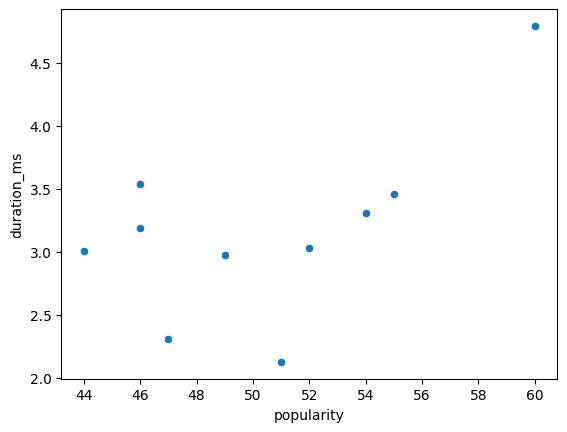

In [4]:
import seaborn as sns

scatter_plot = sns.scatterplot(data = tracks_df, x = "popularity", y = "duration_ms")
fig = scatter_plot.get_figure()
fig.savefig("scatter_plot.png")